# 1. Import Important Libraries
___

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
data = pd.read_csv(r"c:\Users\skynet\AppData\Local\Temp\Rar$DRa18992.7981\online_course_engagement_data.csv")
data

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   int32  
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 597.8 KB


In [20]:
data.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

<Axes: >

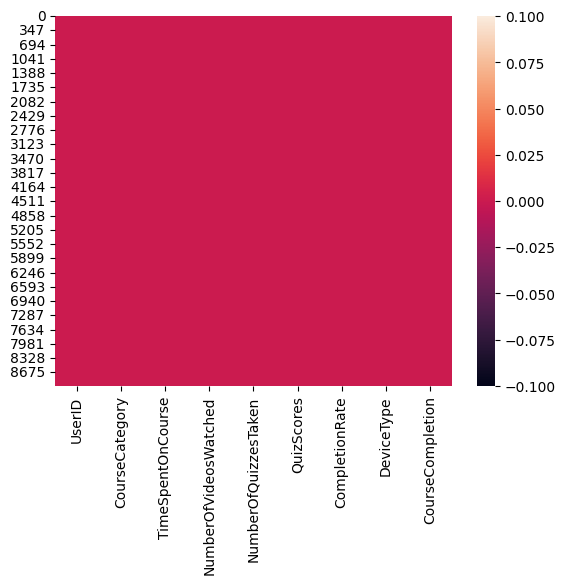

In [21]:
sns.heatmap(data.isnull())

In [22]:
data.duplicated().sum()

877

# 3. Data Analysis
___


In [23]:
data['CourseCompletion'].value_counts()

CourseCompletion
0    5432
1    3568
Name: count, dtype: int64

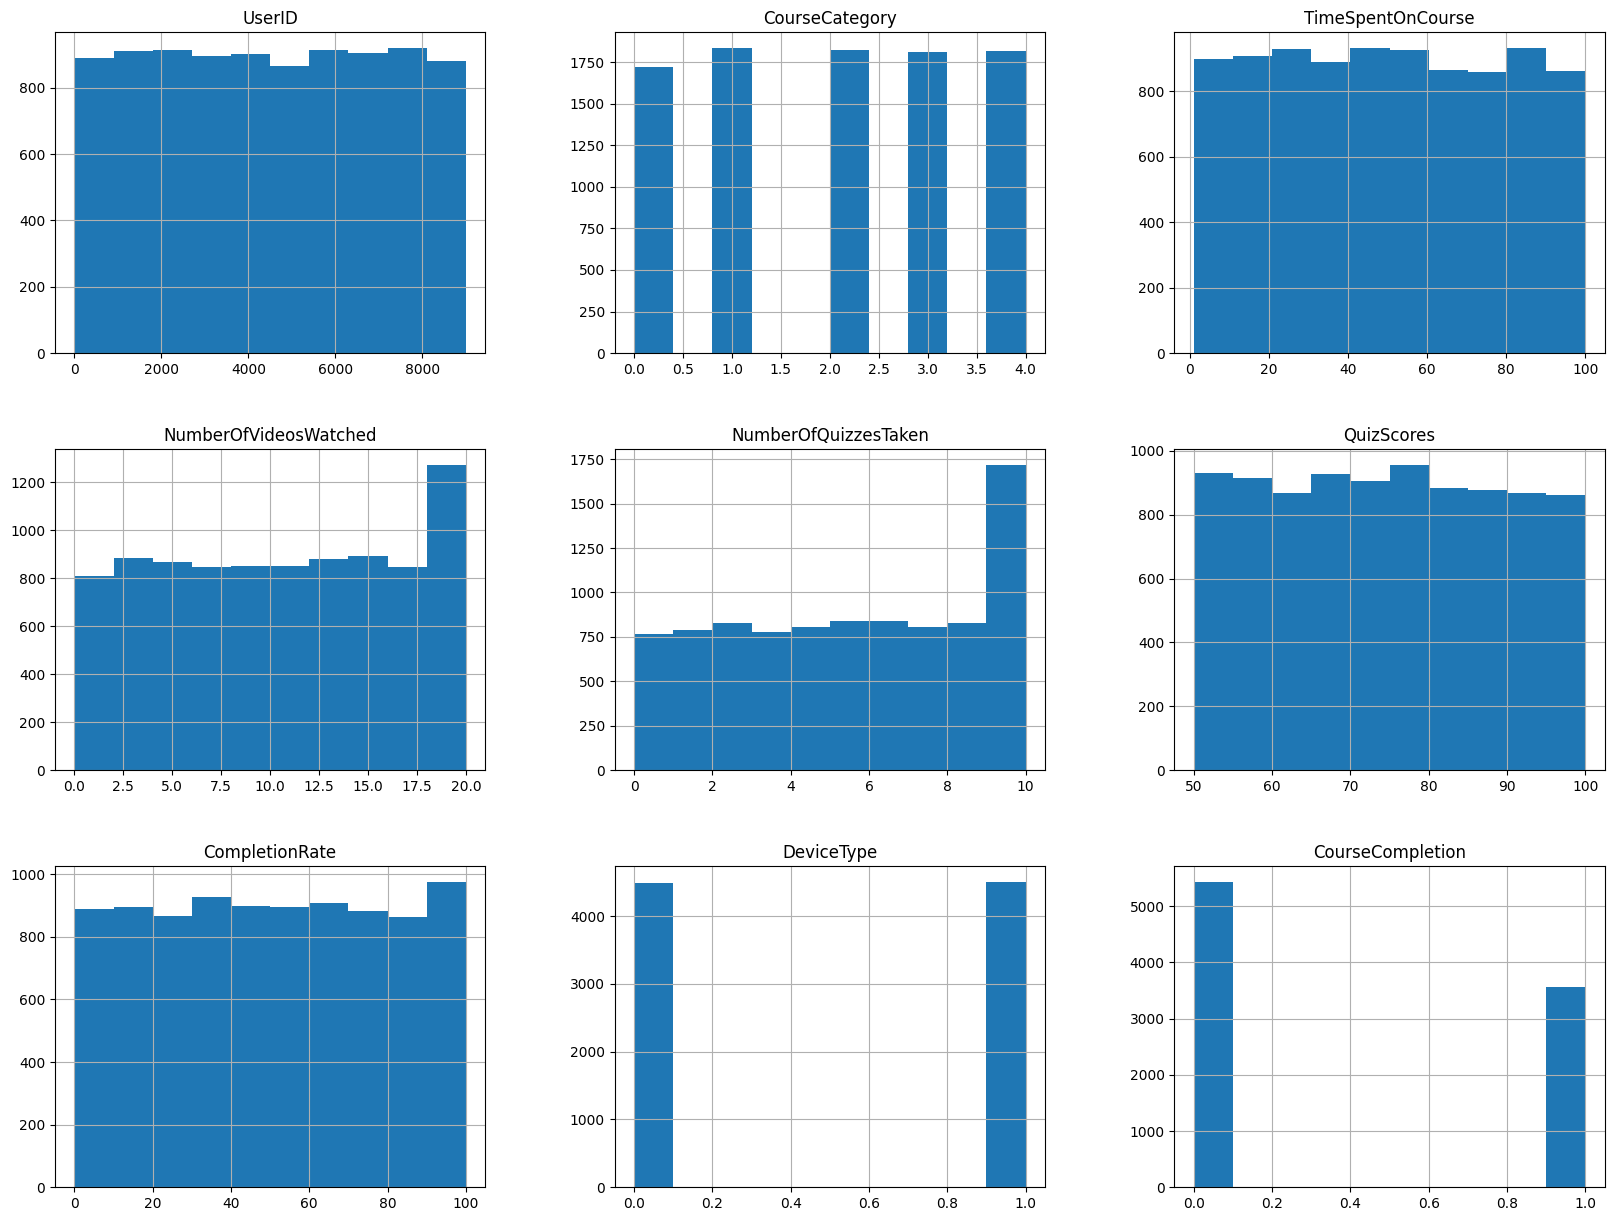

In [24]:
data.hist(figsize= (20 ,15))
plt.show()

# feature Extraction
___

In [25]:
def Grade(score):
    if score > 85:
        return 'A'
    elif score > 70:
        return 'B'
    elif score > 55:
        return 'c'
    else :
        return 'f'
data['grade'] = data['QuizScores'].apply(Grade)
data

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,grade
0,5618,2,29.979719,17,3,50.365656,20.860773,1,0,f
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0,c
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1,B
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1,c
4,3866,3,92.490647,16,0,98.428285,18.102478,0,0,A
...,...,...,...,...,...,...,...,...,...,...
8995,8757,2,37.445225,14,4,54.469359,32.990704,1,0,f
8996,894,4,48.631443,7,7,59.413257,0.254625,0,0,c
8997,6323,2,38.212512,3,3,69.508297,70.188159,1,0,c
8998,3652,2,70.048665,13,10,79.655182,72.975225,1,1,B


In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

<Axes: >

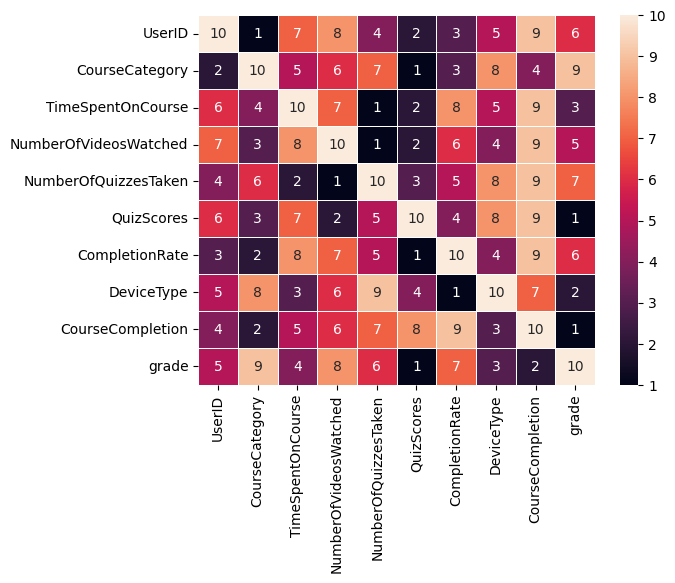

In [28]:
columns_relation = data.corr()
sns.heatmap(columns_relation.rank(axis= 'columns'),annot=True , linewidths=.5)

# Training model (regression)
___


In [29]:
x = data.drop(['QuizScores'] , axis = 1)
y = data['QuizScores']

In [30]:
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state=44 , shuffle= True , test_size= 0.5)
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4500, 9)
(4500, 9)
(4500,)
(4500,)


In [31]:
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [32]:
y_pred_gbr = gbr_model.predict(x_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R^2 Score: {r2_gbr}")

Gradient Boosting Regressor
Mean Squared Error: 16.899529536303916
R^2 Score: 0.9190808662689031


# Training model (classification)
___

In [43]:
xX = data['QuizScores'] 
yy = data['grade']

In [44]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(xX, yy, test_size=0.2, random_state=42)

In [47]:
trained_model = RandomForestClassifier()
Xx_train = pd.DataFrame(Xx_train)
trained_model.fit(Xx_train, yy_train)


RandomForestClassifier()

In [50]:
Xx_test= pd.DataFrame(Xx_test)

y_pred = trained_model.predict(Xx_test)


# Evaluation(classification)
___

In [51]:
accuracy = accuracy_score(yy_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [52]:
print(classification_report(yy_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1800

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

